# **NASA: ASTEROİTLERİN SINIFLANDIRILMASI**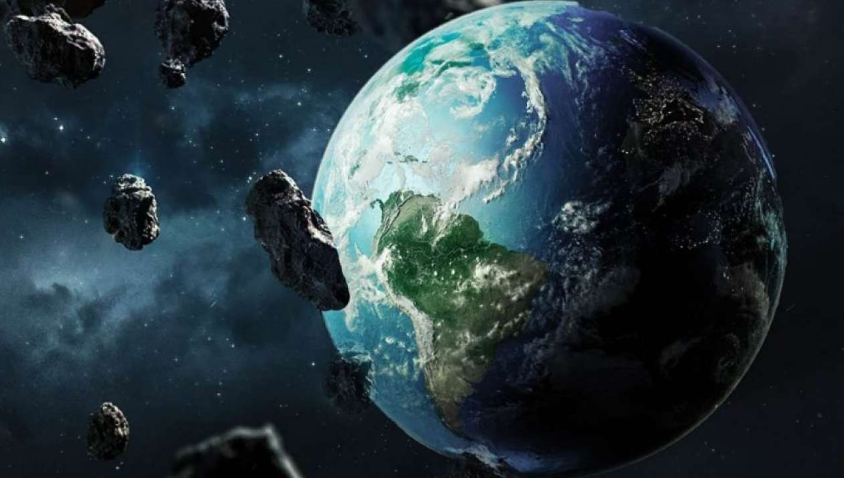

## Veri Seti:
## Nasa veri seti, gözlemlenen meteorlardan elde edilen veri ve ölçümleri içermektedir.

## Özellikler

Neo Reference ID: Dünya'ya yaklaşan bir asteroit (veya kuyruklu yıldız) için Dünya'ya Yakın Nesne referans kimlik numarası

Name: Asteroidin Adı (NEO Referans Kimliği ile aynı)

Absolute Magnitude: Asteroidin parlaklığının bir ölçüsü

Est Dia in (in KM, M, Miles, and Feet) (min) - Asteroidin minimum tahmini çapı

Est Dia in (KM, M, Mil ve Feet cinsinden) (max) - Asteroidin maksimum tahmini çap

Close Approach Date: Asteroidin Dünya'ya yaklaştığı tarih

Epoch Date Close Approach: Asteroidin Dünya'ya yaklaştığı tarih (epok zamanında)

Relative Velocity (in km per sec, km per hr, and miles per hour): Asteroidin dünyaya göre hızı

Miss Dist.(in Astronomical, lunar, km, and miles): Asteroidin Dünya'yı ıskaladığı mesafe

Orbiting Body

Orbit ID: JPL Nasa'nın analizinde kullandığı JPL NEA yörüngesinin kimliği

Orbit Determination Date: Asteroidin yörüngesinin belirlendiği tarih

Orbit Uncertainity: Hesaplanan yörüngedeki belirsizliğin ('ölçüm hataları') bir ölçüsü

Minimum Orbit Intersection: Kendi yörüngelerinde Dünya ile asteroit arasındaki en yakın mesafe (astronomik birim cinsinden)

Jupiter Tisserand Invariant: Asteroitler ve Jüpiter ailesi kuyruklu yıldızları birbirinden ayırmak için kullanılan bir değer

Epoch Osculation: Asteroidin konum ve hız vektörlerinin (salınan yörüngesinin hesaplandığı) belirtildiği zaman örneği

Eccentricity: Asteroidin yörüngesinin mükemmel bir daireden ne kadar saptığını belirten bir değer

Semi Major Axis: Eliptik bir yörüngenin en uzun yarıçapı; asteroidin Güneş'e olan ortalama uzaklığının bir ölçüsü (asteroidler Güneş'in etrafında dönerler)

Inclination: Asteroidin Güneş etrafındaki yörüngesinin eğimini ölçer.

Asc Node Longitude: Eylemsiz çerçeve x ekseni ile yükselen düğümden geçen çizgi arasındaki ekliptik düzlemdeki açı

Orbital Period: Asteroidin Güneş etrafında tek bir yörüngeyi tamamlaması için geçen süre

Perihelion Distance: Asteroidin yörüngesinde Güneş'e en yakın olan noktanın mesafesi

Perihelion Arg: Yükselen düğüm çizgisi ile cismin yörüngesi yönünde ölçülen perihelion arasındaki açı

Aphelion Dist: Asteroidin yörüngesinde Güneş'e en uzak olan noktanın uzaklığı

Perihelion Time:  Asteroidin perihelion evresinden geçiş süresinin uzunluğu

Mean Anomaly: Yörüngedeki bir cismin ortalama hareketinin ve perihelion geçişinden geçen zamanın çarpımı

Mean Motion: Bir cismin belirli bir yarı büyük eksene sahip ideal bir elips etrafında bir yörünge çizmesi için gereken açısal hız

Equinox: Ölçmek için astronomik bir standart (şu anda 'J2000.0')

Hazardous: Asteroit tehlikeli mi? (Doğru veya Yanlış)


## Amaç:
## Bir göktaşının tehlikeli olup olmadığını doğru bir şekilde tahmin etmek.

In [ ]:
# kütüphaneleri import etme

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
!pip install catboost
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [ ]:
import warnings
warnings.simplefilter(action="ignore")

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
# Veri setini okutup inceleyelim.

In [ ]:
df_ = pd.read_csv("/content/nasa.csv")

In [ ]:
df = df_.copy()

In [ ]:
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127,0.284,127.220,284.472,0.079,0.177,417.388,933.308,1995-01-01,788947200000,6.116,22017.004,13680.510,0.419,163.179,62753692.000,38993336.000,Earth,17,2017-04-06 08:36:37,5,0.025,4.634,2458000.500,0.426,1.407,6.026,314.374,609.600,0.808,57.257,2.006,2458161.642,264.838,0.591,J2000,True
1,3723955,3723955,21.300,0.146,0.327,146.068,326.618,0.091,0.203,479.226,1071.581,1995-01-01,788947200000,18.114,65210.346,40519.173,0.383,148.993,57298148.000,35603420.000,Earth,21,2017-04-06 08:32:49,3,0.187,5.457,2458000.500,0.352,1.108,28.413,136.717,425.869,0.718,313.092,1.497,2457794.969,173.741,0.845,J2000,False
2,2446862,2446862,20.300,0.232,0.518,231.502,517.654,0.144,0.322,759.521,1698.342,1995-01-08,789552000000,7.591,27326.560,16979.662,0.051,19.822,7622911.500,4736657.500,Earth,22,2017-04-06 09:20:19,0,0.043,4.557,2458000.500,0.348,1.459,4.238,259.476,643.580,0.951,248.415,1.967,2458120.468,292.894,0.559,J2000,True
3,3092506,3092506,27.400,0.009,0.020,8.801,19.681,0.005,0.012,28.876,64.569,1995-01-15,790156800000,11.174,40225.948,24994.840,0.285,110.990,42683616.000,26522368.000,Earth,7,2017-04-06 09:15:49,6,0.006,5.093,2458000.500,0.217,1.256,7.906,57.173,514.082,0.984,18.708,1.528,2457902.337,68.741,0.700,J2000,False
4,3514799,3514799,21.600,0.127,0.284,127.220,284.472,0.079,0.177,417.388,933.308,1995-01-15,790156800000,9.841,35426.992,22012.955,0.408,158.647,61010824.000,37910368.000,Earth,25,2017-04-06 08:57:58,1,0.035,5.154,2458000.500,0.210,1.226,16.793,84.629,495.598,0.968,158.264,1.484,2457814.455,135.142,0.726,J2000,True


In [ ]:
df.shape

(4687, 40)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [ ]:
df.isnull().values.any() # Eksik değer yok.

False

In [ ]:
# bazı sütunların tarih, isim ve/veya kimlik içerdiği görülmektedir.
# Bu özellikler bize tehlikeli meteorları tanımlamak için herhangi bir ilgili niceliksel bilgi vermediğinden bu sütunları veri setinden kaldıralım.

In [ ]:
df.drop(['Neo Reference ID', 'Name', 'Close Approach Date','Epoch Date Close Approach', 'Orbit Determination Date'], axis=1, inplace=True)

In [ ]:
df.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,21.600,0.127,0.284,127.220,284.472,0.079,0.177,417.388,933.308,6.116,22017.004,13680.510,0.419,163.179,62753692.000,38993336.000,Earth,17,5,0.025,4.634,2458000.500,0.426,1.407,6.026,314.374,609.600,0.808,57.257,2.006,2458161.642,264.838,0.591,J2000,True
1,21.300,0.146,0.327,146.068,326.618,0.091,0.203,479.226,1071.581,18.114,65210.346,40519.173,0.383,148.993,57298148.000,35603420.000,Earth,21,3,0.187,5.457,2458000.500,0.352,1.108,28.413,136.717,425.869,0.718,313.092,1.497,2457794.969,173.741,0.845,J2000,False
2,20.300,0.232,0.518,231.502,517.654,0.144,0.322,759.521,1698.342,7.591,27326.560,16979.662,0.051,19.822,7622911.500,4736657.500,Earth,22,0,0.043,4.557,2458000.500,0.348,1.459,4.238,259.476,643.580,0.951,248.415,1.967,2458120.468,292.894,0.559,J2000,True
3,27.400,0.009,0.020,8.801,19.681,0.005,0.012,28.876,64.569,11.174,40225.948,24994.840,0.285,110.990,42683616.000,26522368.000,Earth,7,6,0.006,5.093,2458000.500,0.217,1.256,7.906,57.173,514.082,0.984,18.708,1.528,2457902.337,68.741,0.700,J2000,False
4,21.600,0.127,0.284,127.220,284.472,0.079,0.177,417.388,933.308,9.841,35426.992,22012.955,0.408,158.647,61010824.000,37910368.000,Earth,25,1,0.035,5.154,2458000.500,0.210,1.226,16.793,84.629,495.598,0.968,158.264,1.484,2457814.455,135.142,0.726,J2000,True


In [ ]:
# Numerik ve Kategorik değişkenlerin yakalanması

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optional
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.

    """
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 4687
Variables: 35
cat_cols: 3
num_cols: 32
cat_but_car: 0
num_but_cat: 1


In [ ]:
cat_cols

['Orbiting Body', 'Equinox', 'Hazardous']

In [ ]:
# Kategorik Değişkenlerin Analizi

       Orbiting Body   Ratio
Earth           4687 100.000
##########################################


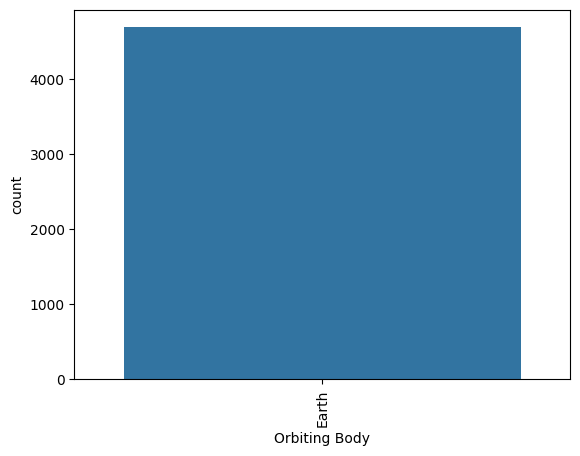

       Equinox   Ratio
J2000     4687 100.000
##########################################


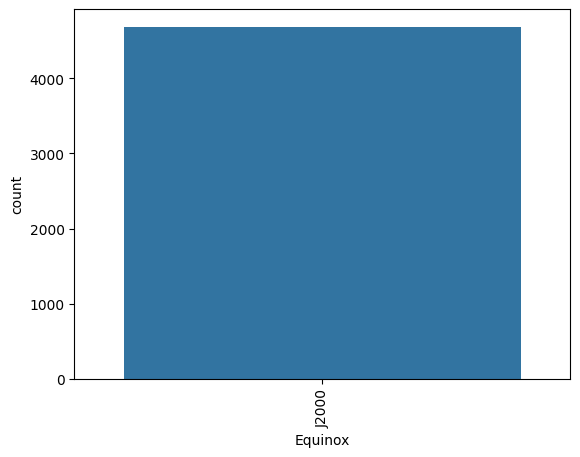

       Hazardous  Ratio
False       3932 83.892
True         755 16.108
##########################################


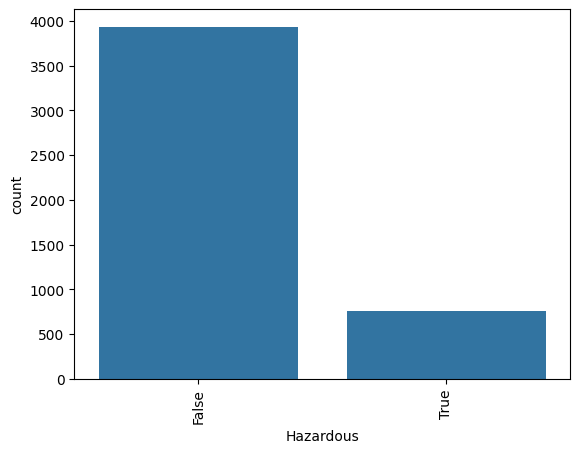

In [ ]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt. xticks(rotation=90)
        plt.show()

for col in cat_cols:
    cat_summary(df, col, plot=True)

In [ ]:
df["Equinox"].unique()

array(['J2000'], dtype=object)

In [ ]:
df['Orbiting Body'].unique()

array(['Earth'], dtype=object)

In [ ]:
# Yukarıda, 'Equinox' ve 'Orbiting Body' sütunlarının yalnızca bir değer içerdiği ve herhangi bir ayırt edici değere sahip olmadığını farkettim.
# Bu nedenle her iki sütunu da siliyorum.

In [ ]:
df.drop(['Orbiting Body', 'Equinox'], axis=1, inplace=True)

In [ ]:
# Numerik Değişkenlerin Analizi

count   4687.000
mean      22.268
std        2.891
min       11.160
5%        18.000
10%       18.800
20%       19.700
30%       20.500
40%       21.200
50%       21.900
60%       22.900
70%       24.000
80%       25.000
90%       26.300
95%       27.200
99%       28.665
max       32.100
Name: Absolute Magnitude, dtype: float64


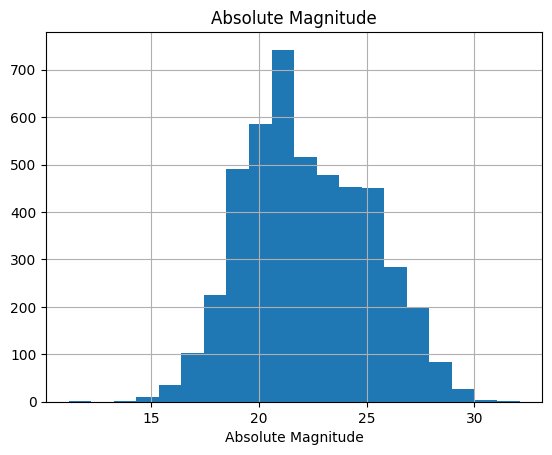

count   4687.000
mean       0.205
std        0.370
min        0.001
5%         0.010
10%        0.015
20%        0.027
30%        0.042
40%        0.070
50%        0.111
60%        0.153
70%        0.211
80%        0.305
90%        0.462
95%        0.668
99%        1.404
max       15.580
Name: Est Dia in KM(min), dtype: float64


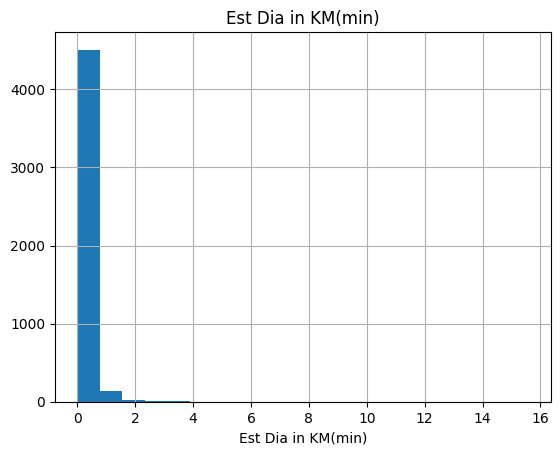

count   4687.000
mean       0.458
std        0.826
min        0.002
5%         0.022
10%        0.033
20%        0.059
30%        0.094
40%        0.156
50%        0.248
60%        0.342
70%        0.472
80%        0.682
90%        1.033
95%        1.493
99%        3.140
max       34.837
Name: Est Dia in KM(max), dtype: float64


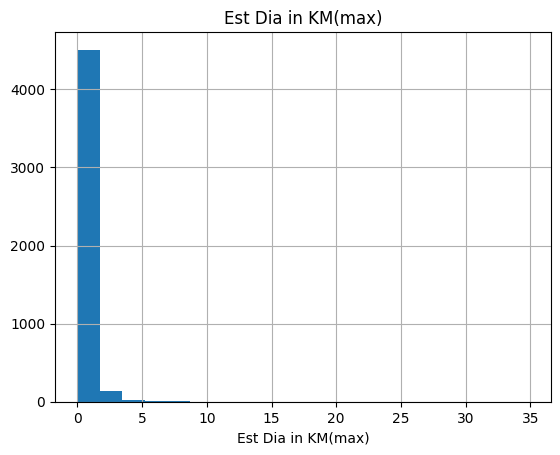

count    4687.000
mean      204.604
std       369.573
min         1.011
5%          9.651
10%        14.607
20%        26.580
30%        42.126
40%        69.913
50%       110.804
60%       152.952
70%       211.132
80%       305.179
90%       461.907
95%       667.659
99%      1404.142
max     15579.552
Name: Est Dia in M(min), dtype: float64


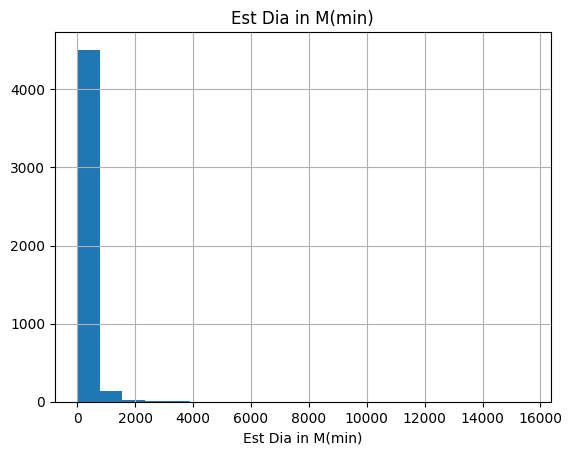

count    4687.000
mean      457.509
std       826.391
min         2.260
5%         21.579
10%        32.662
20%        59.435
30%        94.198
40%       156.329
50%       247.765
60%       342.011
70%       472.106
80%       682.402
90%      1032.856
95%      1492.932
99%      3139.757
max     34836.938
Name: Est Dia in M(max), dtype: float64


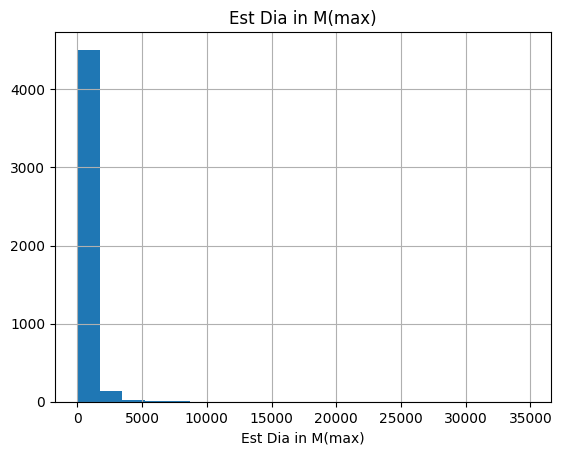

count   4687.000
mean       0.127
std        0.230
min        0.001
5%         0.006
10%        0.009
20%        0.017
30%        0.026
40%        0.043
50%        0.069
60%        0.095
70%        0.131
80%        0.190
90%        0.287
95%        0.415
99%        0.872
max        9.681
Name: Est Dia in Miles(min), dtype: float64


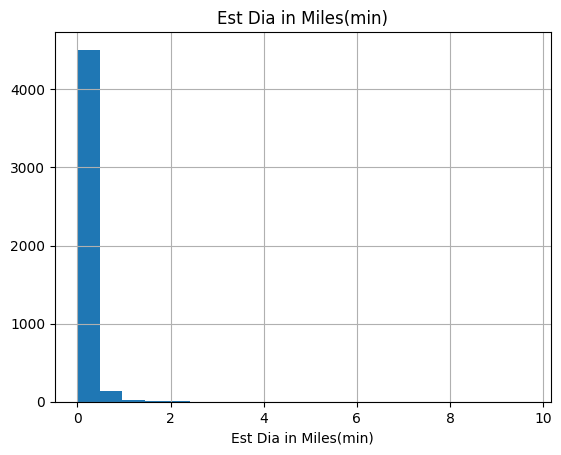

count   4687.000
mean       0.284
std        0.513
min        0.001
5%         0.013
10%        0.020
20%        0.037
30%        0.059
40%        0.097
50%        0.154
60%        0.213
70%        0.293
80%        0.424
90%        0.642
95%        0.928
99%        1.951
max       21.647
Name: Est Dia in Miles(max), dtype: float64


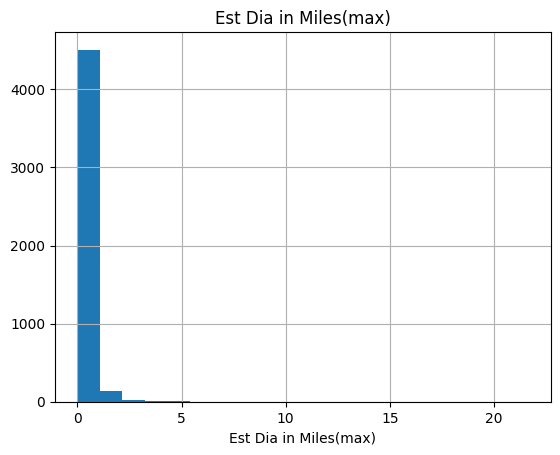

count    4687.000
mean      671.274
std      1212.511
min         3.315
5%         31.662
10%        47.923
20%        87.205
30%       138.210
40%       229.372
50%       363.530
60%       501.811
70%       692.692
80%      1001.244
90%      1515.444
95%      2190.484
99%      4606.765
max     51114.019
Name: Est Dia in Feet(min), dtype: float64


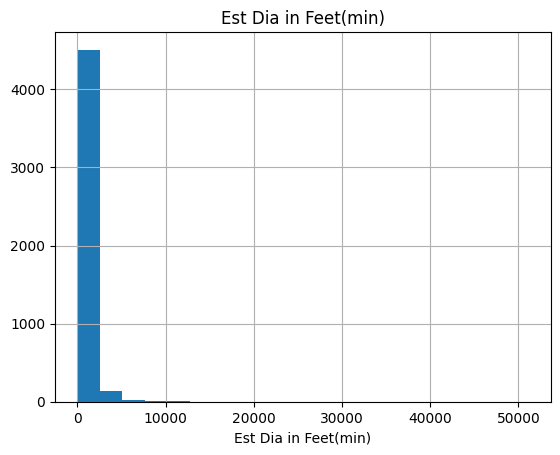

count     4687.000
mean      1501.014
std       2711.257
min          7.414
5%          70.799
10%        107.158
20%        194.996
30%        309.047
40%        512.891
50%        812.877
60%       1122.083
70%       1548.906
80%       2238.850
90%       3388.637
95%       4898.070
99%      10301.040
max     114294.421
Name: Est Dia in Feet(max), dtype: float64


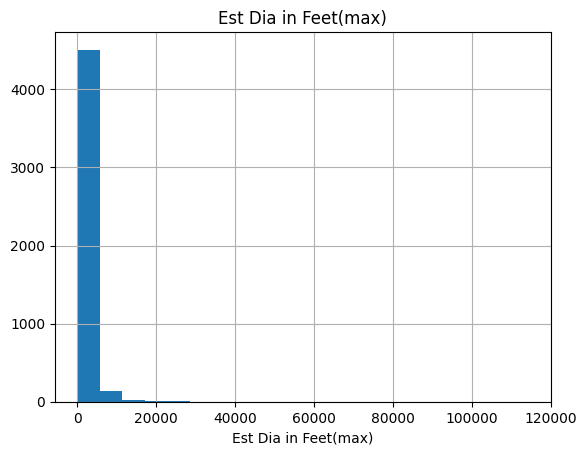

count   4687.000
mean      13.971
std        7.293
min        0.336
5%         4.387
10%        5.626
20%        7.571
30%        9.275
40%       11.081
50%       12.918
60%       14.791
70%       16.780
80%       19.486
90%       23.854
95%       27.870
99%       36.234
max       44.634
Name: Relative Velocity km per sec, dtype: float64


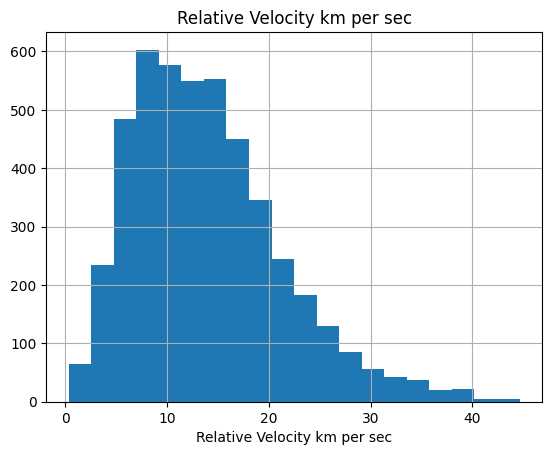

count     4687.000
mean     50294.920
std      26255.601
min       1207.815
5%       15793.825
10%      20251.944
20%      27255.809
30%      33389.971
40%      39892.440
50%      46504.401
60%      53246.220
70%      60406.586
80%      70148.149
90%      85873.589
95%     100333.145
99%     130444.033
max     160681.488
Name: Relative Velocity km per hr, dtype: float64


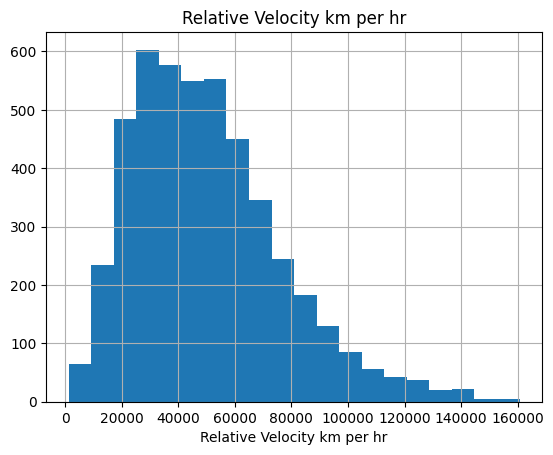

count    4687.000
mean    31251.307
std     16314.210
min       750.489
5%       9813.669
10%     12583.770
20%     16935.700
30%     20747.229
40%     24787.611
50%     28896.026
60%     33085.130
70%     37534.303
80%     43587.332
90%     53358.509
95%     62343.115
99%     81052.850
max     99841.228
Name: Miles per hour, dtype: float64


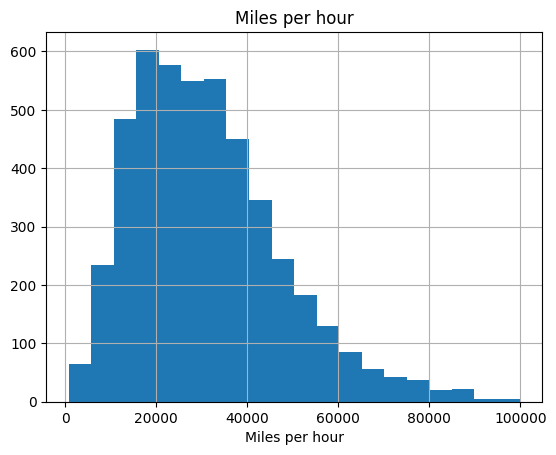

count   4687.000
mean       0.257
std        0.146
min        0.000
5%         0.022
10%        0.046
20%        0.102
30%        0.160
40%        0.215
50%        0.265
60%        0.310
70%        0.361
80%        0.405
90%        0.452
95%        0.476
99%        0.496
max        0.500
Name: Miss Dist.(Astronomical), dtype: float64


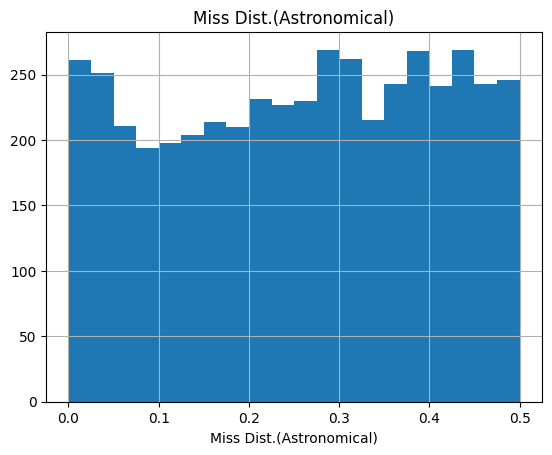

count   4687.000
mean      99.887
std       56.715
min        0.069
5%         8.685
10%       18.063
20%       39.629
30%       62.292
40%       83.650
50%      103.096
60%      120.629
70%      140.367
80%      157.696
90%      175.793
95%      185.022
99%      192.932
max      194.455
Name: Miss Dist.(lunar), dtype: float64


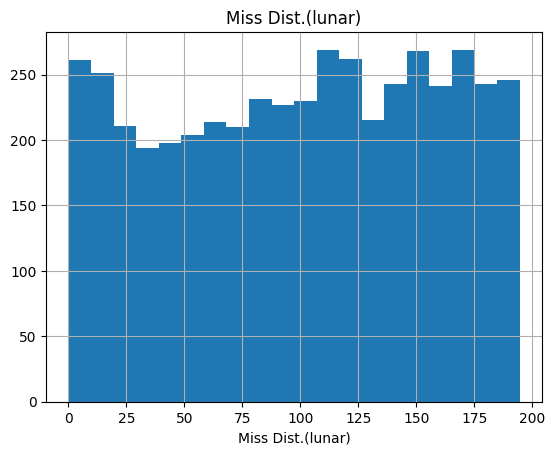

count       4687.000
mean    38413466.872
std     21811097.771
min        26609.887
5%       3339832.400
10%      6946574.600
20%     15240277.600
30%     23955836.800
40%     32169433.600
50%     39647712.000
60%     46390405.600
70%     53981039.200
80%     60645332.000
90%     67604892.800
95%     71153819.200
99%     74196050.560
max     74781600.000
Name: Miss Dist.(kilometers), dtype: float64


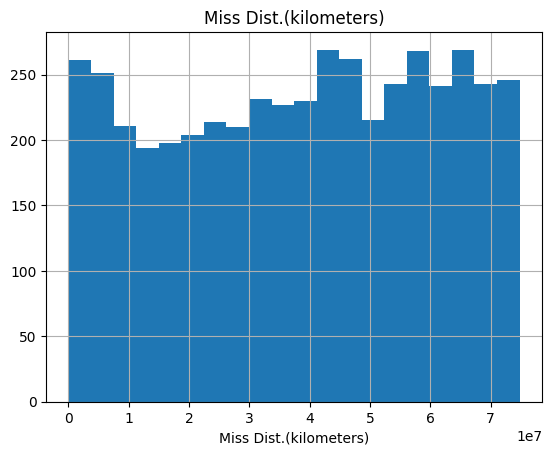

count       4687.000
mean    23869021.679
std     13552787.796
min        16534.617
5%       2075275.625
10%      4316401.300
20%      9469869.400
30%     14885467.000
40%     19989159.200
50%     24635948.000
60%     28825662.400
70%     33542262.400
80%     37683262.400
90%     42007732.800
95%     44212934.400
99%     46103289.040
max     46467132.000
Name: Miss Dist.(miles), dtype: float64


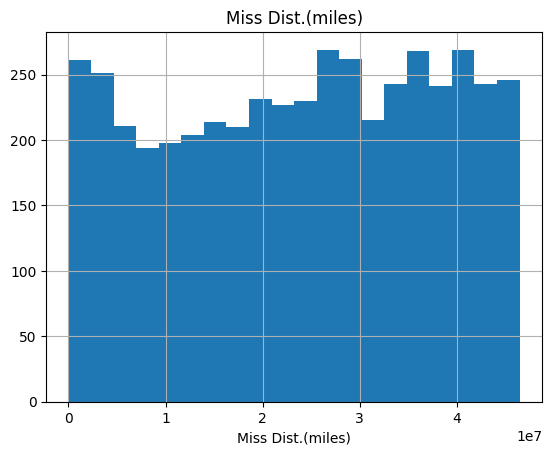

count   4687.000
mean      28.301
std       38.300
min        1.000
5%         4.000
10%        6.000
20%        8.000
30%       10.000
40%       13.000
50%       16.000
60%       21.000
70%       27.000
80%       38.000
90%       63.000
95%       92.000
99%      185.420
max      611.000
Name: Orbit ID, dtype: float64


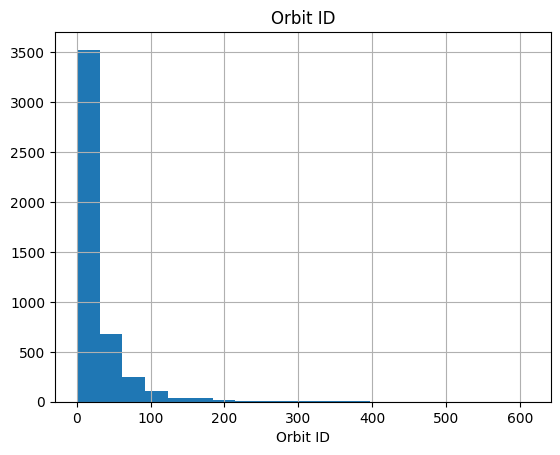

count   4687.000
mean       3.517
std        3.078
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        1.000
40%        1.000
50%        3.000
60%        5.000
70%        6.000
80%        7.000
90%        7.000
95%        8.000
99%        9.000
max        9.000
Name: Orbit Uncertainity, dtype: float64


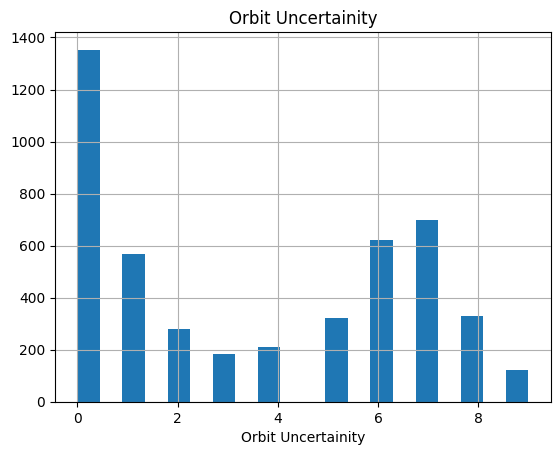

count   4687.000
mean       0.082
std        0.090
min        0.000
5%         0.001
10%        0.003
20%        0.011
30%        0.019
40%        0.031
50%        0.047
60%        0.069
70%        0.104
80%        0.149
90%        0.218
95%        0.276
99%        0.379
max        0.478
Name: Minimum Orbit Intersection, dtype: float64


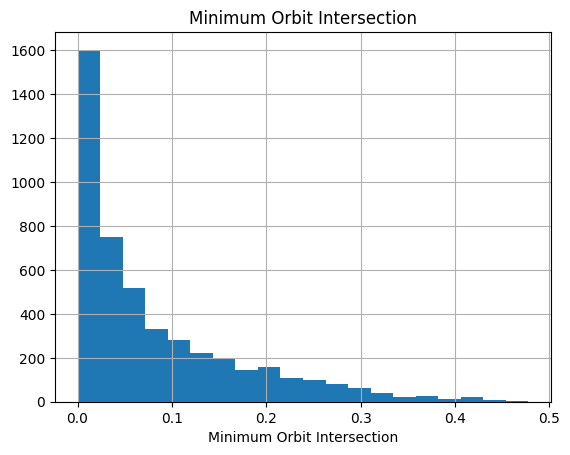

count   4687.000
mean       5.056
std        1.238
min        2.196
5%         3.142
10%        3.372
20%        3.794
30%        4.283
40%        4.673
50%        5.071
60%        5.441
70%        5.851
80%        6.179
90%        6.664
95%        7.016
99%        7.733
max        9.025
Name: Jupiter Tisserand Invariant, dtype: float64


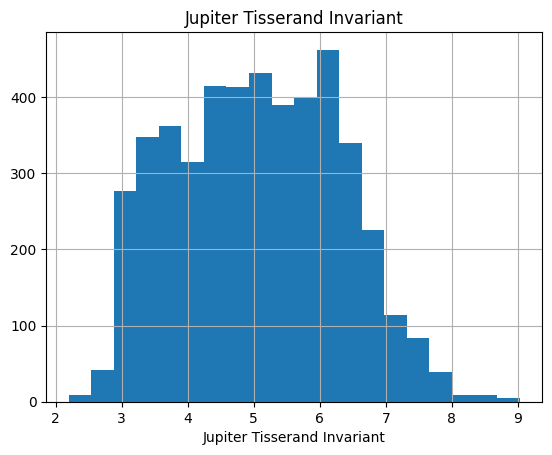

count      4687.000
mean    2457723.608
std         920.297
min     2450164.500
5%      2455640.500
10%     2457402.700
20%     2458000.500
30%     2458000.500
40%     2458000.500
50%     2458000.500
60%     2458000.500
70%     2458000.500
80%     2458000.500
90%     2458000.500
95%     2458000.500
99%     2458000.500
max     2458019.500
Name: Epoch Osculation, dtype: float64


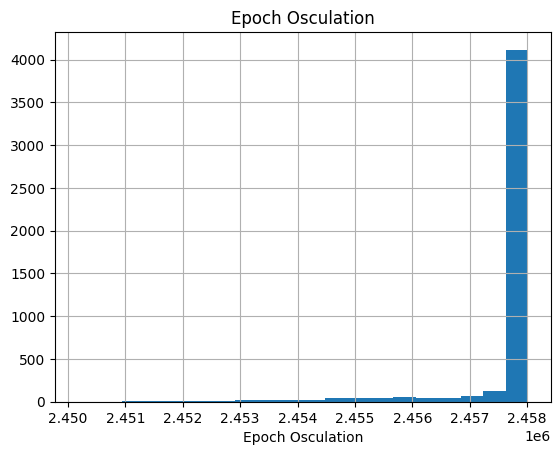

count   4687.000
mean       0.383
std        0.180
min        0.008
5%         0.112
10%        0.156
20%        0.214
30%        0.267
40%        0.322
50%        0.372
60%        0.423
70%        0.483
80%        0.543
90%        0.624
95%        0.698
99%        0.817
max        0.960
Name: Eccentricity, dtype: float64


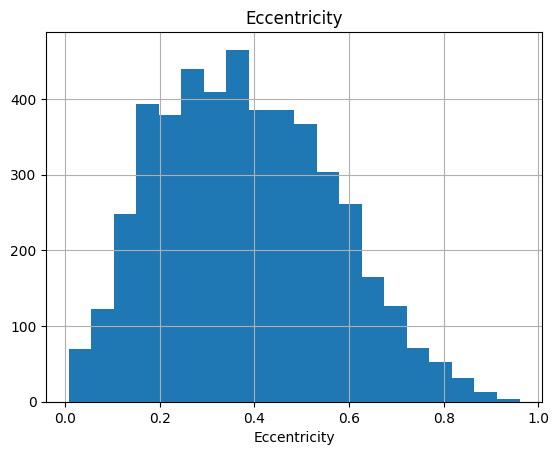

count   4687.000
mean       1.400
std        0.524
min        0.616
5%         0.823
10%        0.878
20%        0.962
30%        1.034
40%        1.132
50%        1.241
60%        1.369
70%        1.569
80%        1.841
90%        2.221
95%        2.473
99%        2.838
max        5.072
Name: Semi Major Axis, dtype: float64


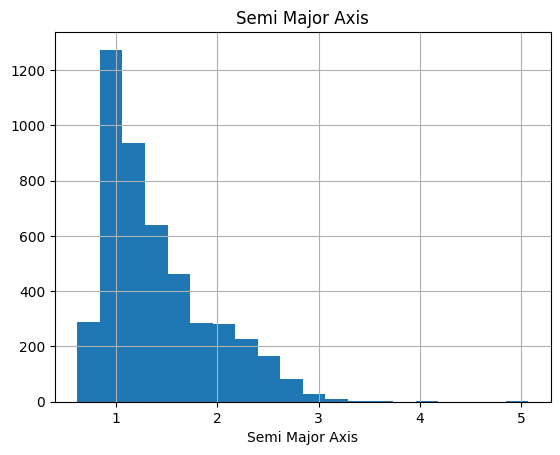

count   4687.000
mean      13.374
std       10.936
min        0.015
5%         1.523
10%        2.435
20%        4.145
30%        5.843
40%        7.709
50%       10.312
60%       13.359
70%       17.220
80%       21.600
90%       28.206
95%       34.559
99%       50.769
max       75.407
Name: Inclination, dtype: float64


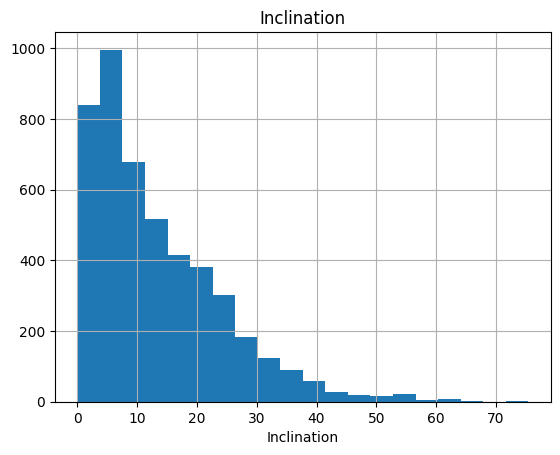

count   4687.000
mean     172.157
std      103.277
min        0.002
5%        15.248
10%       30.478
20%       63.993
30%      102.684
40%      138.389
50%      172.625
60%      200.303
70%      233.890
80%      278.818
90%      322.023
95%      342.550
99%      356.152
max      359.906
Name: Asc Node Longitude, dtype: float64


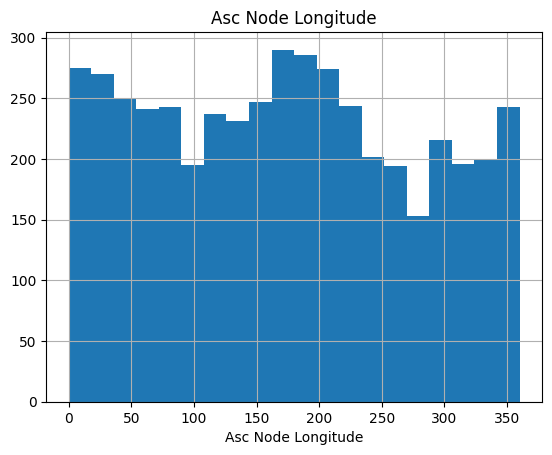

count   4687.000
mean     635.582
std      370.955
min      176.557
5%       272.953
10%      300.488
20%      344.443
30%      384.180
40%      439.691
50%      504.947
60%      585.082
70%      717.569
80%      912.620
90%     1209.083
95%     1420.384
99%     1746.028
max     4172.231
Name: Orbital Period, dtype: float64


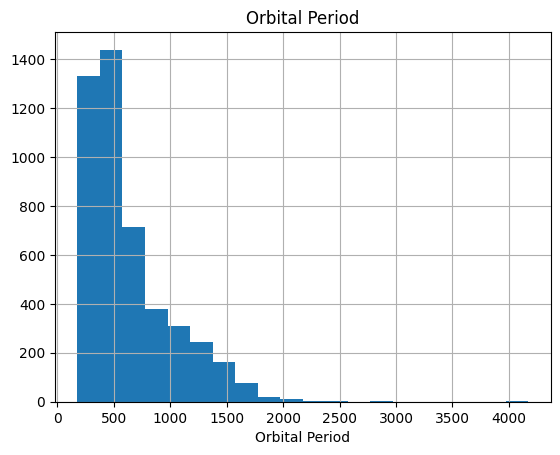

count   4687.000
mean       0.813
std        0.242
min        0.081
5%         0.403
10%        0.484
20%        0.590
30%        0.673
40%        0.762
50%        0.833
60%        0.904
70%        0.970
80%        1.027
90%        1.114
95%        1.191
99%        1.278
max        1.300
Name: Perihelion Distance, dtype: float64


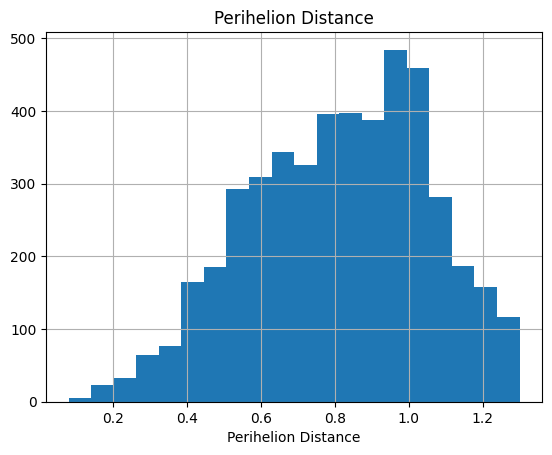

count   4687.000
mean     183.932
std      103.513
min        0.007
5%        19.801
10%       38.439
20%       75.065
30%      112.770
40%      148.024
50%      189.762
60%      224.390
70%      254.837
80%      288.781
90%      324.745
95%      343.749
99%      356.581
max      359.993
Name: Perihelion Arg, dtype: float64


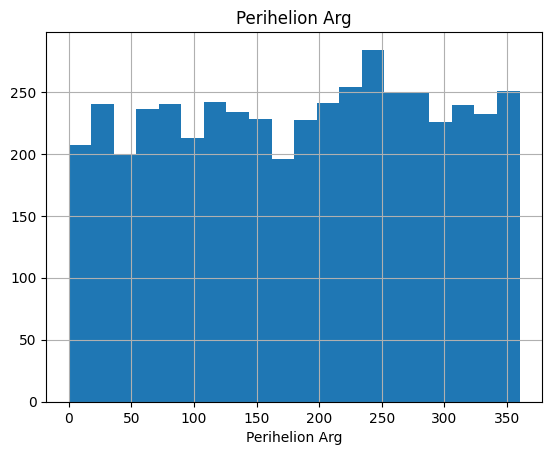

count   4687.000
mean       1.987
std        0.952
min        0.804
5%         1.060
10%        1.107
20%        1.211
30%        1.319
40%        1.453
50%        1.618
60%        1.877
70%        2.220
80%        2.752
90%        3.486
95%        4.003
99%        4.689
max        8.984
Name: Aphelion Dist, dtype: float64


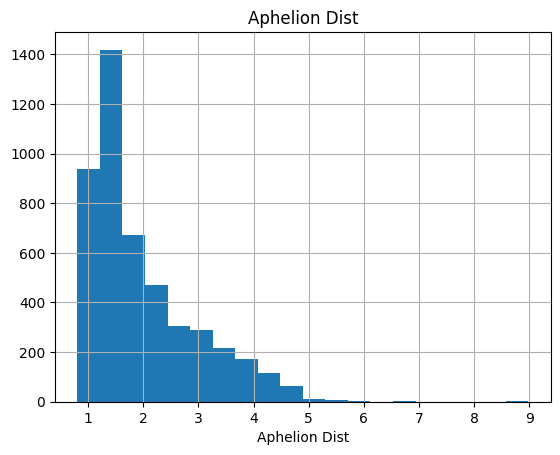

count      4687.000
mean    2457728.108
std         944.226
min     2450100.317
5%      2455577.780
10%     2457298.575
20%     2457752.201
30%     2457856.070
40%     2457913.918
50%     2457972.767
60%     2458029.488
70%     2458083.860
80%     2458138.671
90%     2458224.668
95%     2458326.004
99%     2458559.836
max     2458838.860
Name: Perihelion Time, dtype: float64


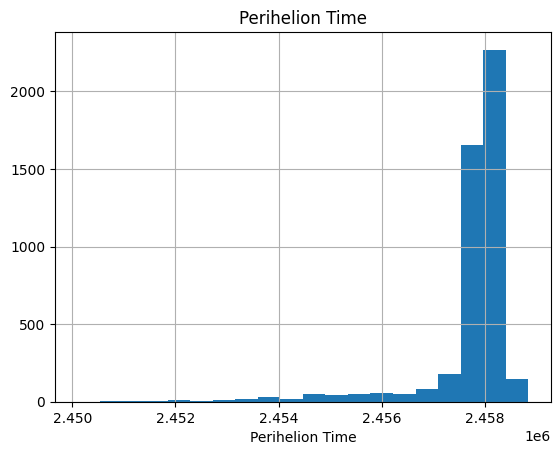

count   4687.000
mean     181.168
std      107.502
min        0.003
5%        13.775
10%       29.811
20%       68.476
30%      103.193
40%      143.127
50%      185.719
60%      219.362
70%      255.303
80%      294.607
90%      329.690
95%      344.354
99%      356.206
max      359.918
Name: Mean Anomaly, dtype: float64


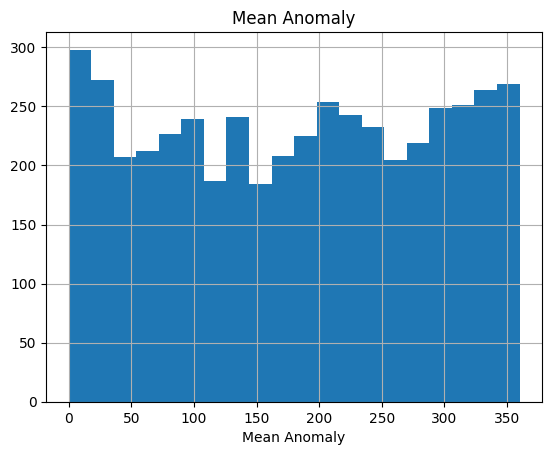

count   4687.000
mean       0.738
std        0.343
min        0.086
5%         0.253
10%        0.298
20%        0.394
30%        0.502
40%        0.615
50%        0.713
60%        0.819
70%        0.937
80%        1.045
90%        1.198
95%        1.319
99%        1.576
max        2.039
Name: Mean Motion, dtype: float64


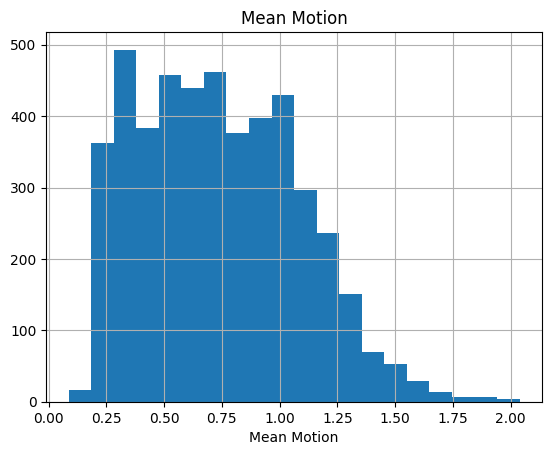

In [ ]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

for col in num_cols:
    num_summary(df, col, plot=True)

In [ ]:
# Korelasyon

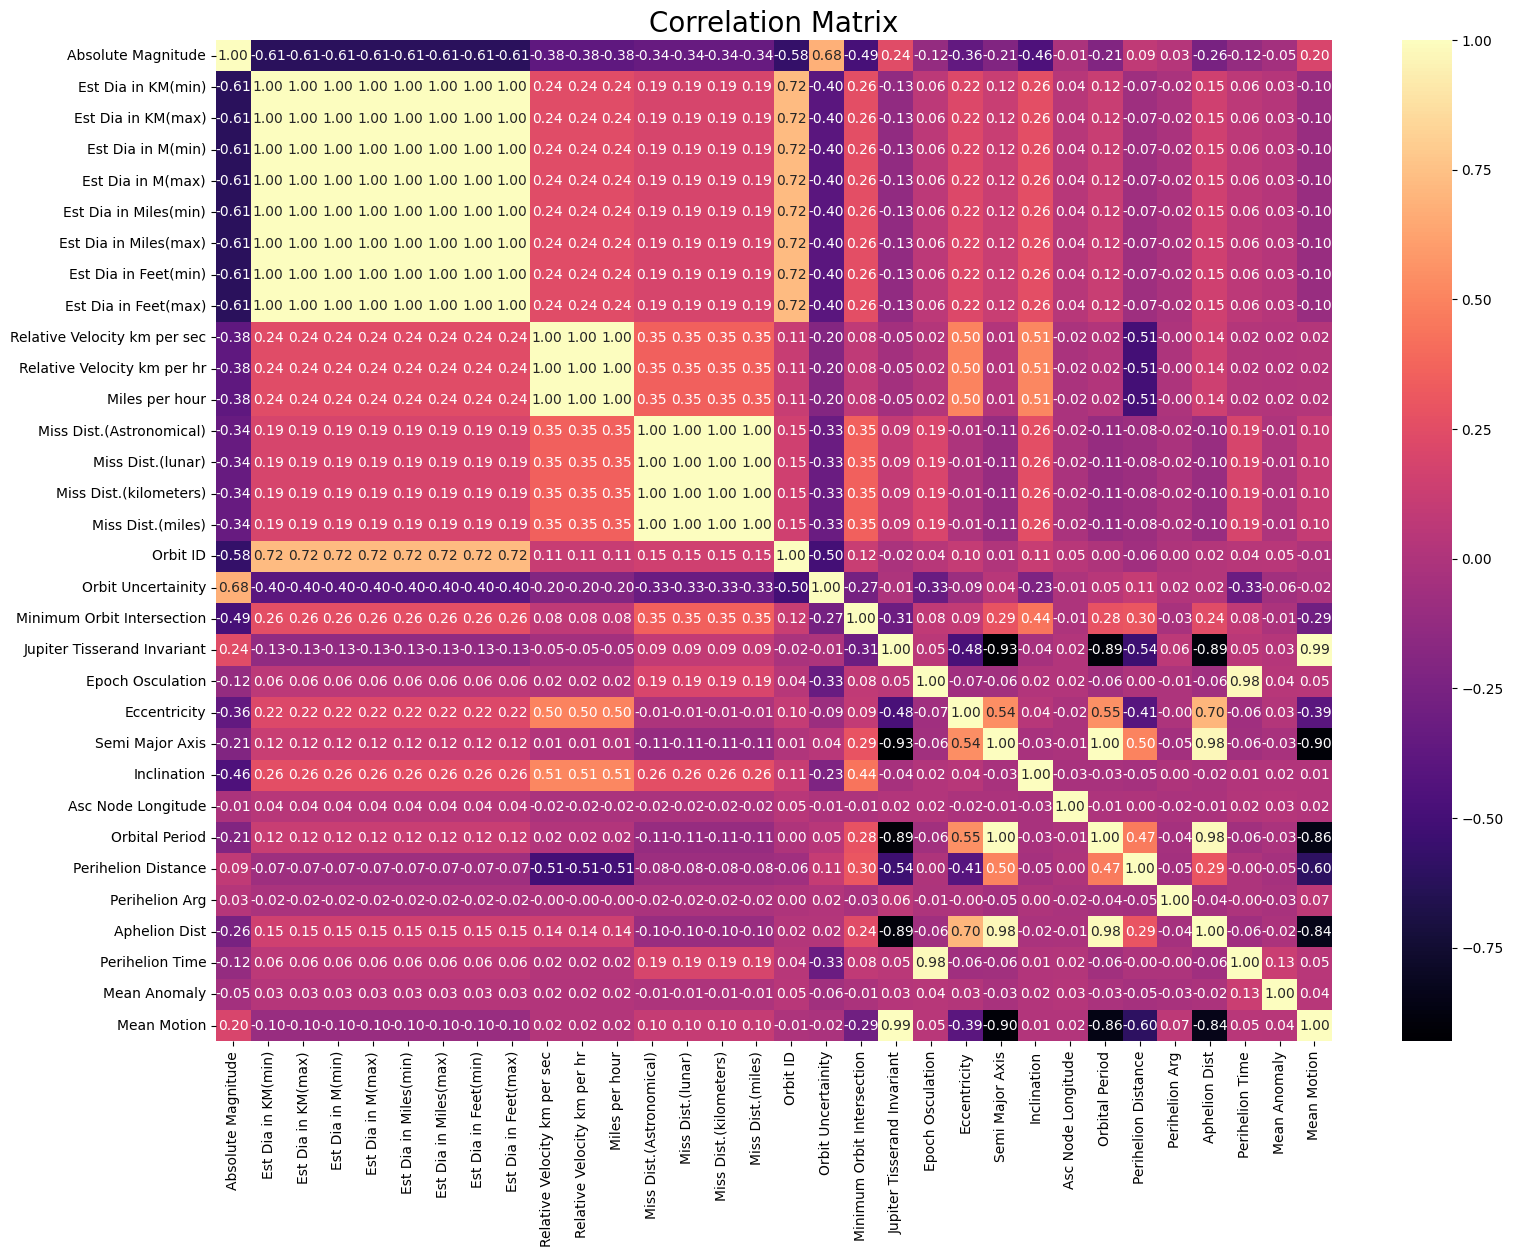

In [ ]:
df[num_cols].corr()

# Korelasyon Matrisi
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [ ]:
# Asteroitlerin Tahmini Çapının Min ve Maks değerlerini gösteren 8 sütun olduğunu görebiliriz.
# Asteroitlerin Tahmini Çapının KM(min) ve KM(max) değerlerinin ortalamasını içeren yeni bir sütun oluşturup geri kalanları siliyorum.

In [ ]:
df['avg_dia'] = df[['Est Dia in KM(min)', 'Est Dia in KM(max)']].mean(axis=1)

In [ ]:
df.drop(columns = ['Est Dia in KM(min)', 'Est Dia in KM(max)', 'Est Dia in M(min)',
               'Est Dia in M(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
               'Est Dia in Feet(min)', 'Est Dia in Feet(max)'], inplace=True)

In [ ]:
# Bağıl Hızı gösteren 3 sütun vardır. Bağıl Hızı km/saat olarak bırakıyorum.

In [ ]:
df.drop(columns = ['Relative Velocity km per sec', 'Miles per hour'], inplace=True )

In [ ]:
# Asteroidin Dünya'ya uzaklığını gösteren 4 sütun vardır. Asteroidin Dünya'ya uzaklığını kilometre olarak bırakıp geride kalan değişkenleri siliyorum.

In [ ]:
df.drop(columns=['Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(miles)'], inplace=True)

In [ ]:
df.corrwith(df["Hazardous"]).sort_values(ascending=False)

Hazardous                      1.000
Orbit ID                       0.247
Relative Velocity km per hr    0.192
Eccentricity                   0.183
avg_dia                        0.132
Mean Anomaly                   0.054
Epoch Osculation               0.041
Aphelion Dist                  0.041
Perihelion Time                0.038
Miss Dist.(kilometers)         0.032
Asc Node Longitude             0.018
Mean Motion                    0.013
Inclination                    0.010
Jupiter Tisserand Invariant   -0.003
Perihelion Arg                -0.004
Semi Major Axis               -0.011
Orbital Period                -0.011
Perihelion Distance           -0.207
Minimum Orbit Intersection    -0.289
Absolute Magnitude            -0.326
Orbit Uncertainity            -0.329
dtype: float64

In [ ]:
# Aykırı Değer Analizi

In [ ]:
# Aykırı değerlerden kurtulmak için önce eşik değeri hesapladık.
def outlier_thresholds(dataframe, variable, low_quantile=0.10, up_quantile=0.90):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

In [ ]:
# Bu eşik değere göre baskılama yapacağız.
def replace_with_thresholds(dataframe, variable):
  low_limit, up_limit = outlier_thresholds(dataframe, variable)
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
  dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Absolute Magnitude,4687.000,22.268,2.891,11.160,20.100,21.900,24.500,32.100
Relative Velocity km per hr,4687.000,50294.920,26255.601,1207.815,30358.313,46504.401,65079.535,160681.488
Miss Dist.(kilometers),4687.000,38413466.872,21811097.771,26609.887,19959283.000,39647712.000,57468628.000,74781600.000
Orbit ID,4687.000,28.301,38.300,1.000,9.000,16.000,31.000,611.000
Orbit Uncertainity,4687.000,3.517,3.078,0.000,0.000,3.000,6.000,9.000
Minimum Orbit Intersection,4687.000,0.082,0.090,0.000,0.015,0.047,0.124,0.478
Jupiter Tisserand Invariant,4687.000,5.056,1.238,2.196,4.050,5.071,6.019,9.025
Epoch Osculation,4687.000,2457723.608,920.297,2450164.500,2458000.500,2458000.500,2458000.500,2458019.500
Eccentricity,4687.000,0.383,0.180,0.008,0.241,0.372,0.512,0.960
Semi Major Axis,4687.000,1.400,0.524,0.616,1.001,1.241,1.678,5.072


In [ ]:
replace_with_thresholds(df, "avg_dia")
replace_with_thresholds(df, "Semi Major Axis")
replace_with_thresholds(df, "Inclination")
replace_with_thresholds(df, "Orbital Period")
replace_with_thresholds(df, "Aphelion Dist")

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Absolute Magnitude,4687.000,22.268,2.891,11.160,20.100,21.900,24.500,32.100
Relative Velocity km per hr,4687.000,50294.920,26255.601,1207.815,30358.313,46504.401,65079.535,160681.488
Miss Dist.(kilometers),4687.000,38413466.872,21811097.771,26609.887,19959283.000,39647712.000,57468628.000,74781600.000
Orbit ID,4687.000,28.301,38.300,1.000,9.000,16.000,31.000,611.000
Orbit Uncertainity,4687.000,3.517,3.078,0.000,0.000,3.000,6.000,9.000
Minimum Orbit Intersection,4687.000,0.082,0.090,0.000,0.015,0.047,0.124,0.478
Jupiter Tisserand Invariant,4687.000,5.056,1.238,2.196,4.050,5.071,6.019,9.025
Epoch Osculation,4687.000,2457723.608,920.297,2450164.500,2458000.500,2458000.500,2458000.500,2458019.500
Eccentricity,4687.000,0.383,0.180,0.008,0.241,0.372,0.512,0.960
Semi Major Axis,4687.000,1.400,0.523,0.616,1.001,1.241,1.678,4.236


In [ ]:
# Görselleştirme

<Axes: >

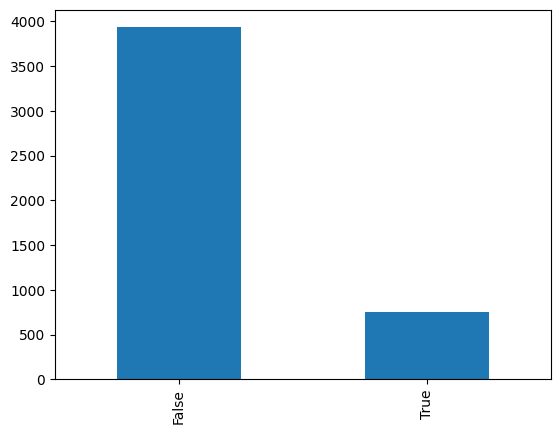

In [ ]:
df["Hazardous"].value_counts().plot(kind="bar")

# Hedef değişkeninin çubuk grafik ile görselleştirilmesi

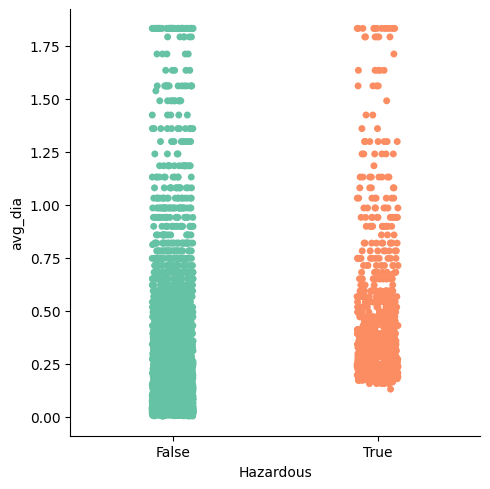

In [ ]:
sns.catplot(x = "Hazardous", y = "avg_dia", palette = "Set2", data = df)

# Tehlikeli asteroitlerin çoğunun çapı büyük değildir.

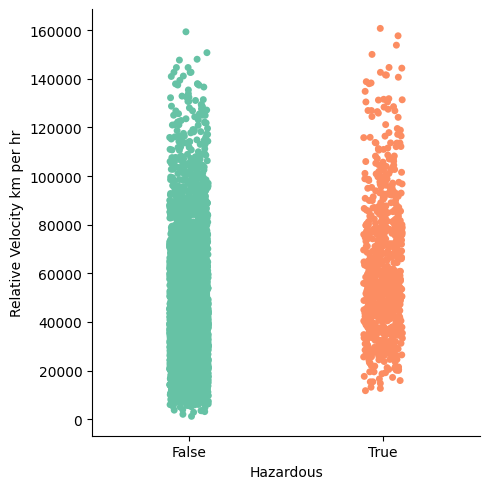

In [ ]:
sns.catplot(x = "Hazardous", y = "Relative Velocity km per hr", palette = "Set2", data = df)

# Tehlikeli asteroitlerin bağıl hızları yaklaşık olarak 20.000'den başlar

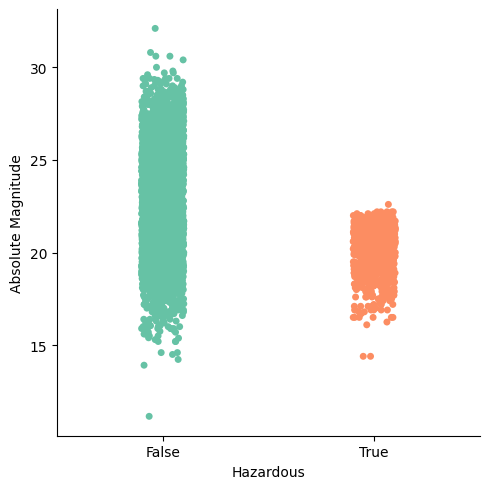

In [ ]:
sns.catplot(x = "Hazardous", y = "Absolute Magnitude", palette = "Set2", data = df)

# Tehlikeli asteroitlerin çoğu 18-23 arasında değişken Mutlak Büyüklük değerine sahiptir.

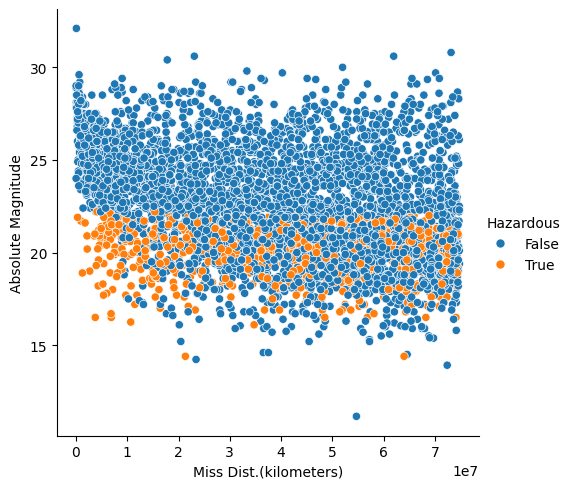

In [ ]:
sns.relplot(x= 'Miss Dist.(kilometers)', y = 'Absolute Magnitude', hue = "Hazardous", data = df)

# Tehlikeli Asteroitlerin çoğu 18-23 arasında Mutlak Büyüklüğe sahip ve Dünya ile en yakın yaklaşma noktasındaki uzaklığı 0-2 km arası yoğunlaştığı görülüyor.

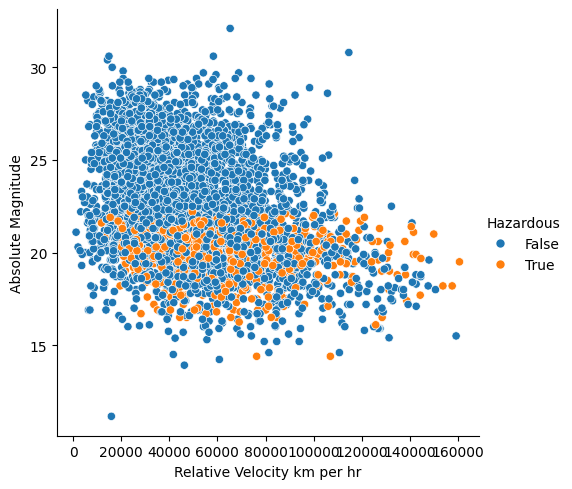

In [ ]:
sns.relplot(x='Relative Velocity km per hr', y = 'Absolute Magnitude', hue = "Hazardous", data = df)

# Tehlikeli Asteroitlerin çoğu 18-23 arasında Mutlak Büyüklüğe sahip ve 40.000 ile 80.000 arasında Bağıl Hıza sahip olduğu görülüyor.

In [ ]:
# Verimizi modellemeye uygun hale getirmek için Hazardous değişkenindeki True ve False'u 1 ve 0'a atayacağız.

In [ ]:
df['Hazardous'] = df['Hazardous'].map({True: 1, False: 0})

In [ ]:
df.head()

,Absolute Magnitude,Relative Velocity km per hr,Miss Dist.(kilometers),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous,avg_dia
0,21.600,22017.004,62753692.000,17,5,0.025,4.634,2458000.500,0.426,1.407,6.026,314.374,609.600,0.808,57.257,2.006,2458161.642,264.838,0.591,1,0.206
1,21.300,65210.346,57298148.000,21,3,0.187,5.457,2458000.500,0.352,1.108,28.413,136.717,425.869,0.718,313.092,1.497,2457794.969,173.741,0.845,0,0.236
2,20.300,27326.560,7622911.500,22,0,0.043,4.557,2458000.500,0.348,1.459,4.238,259.476,643.580,0.951,248.415,1.967,2458120.468,292.894,0.559,1,0.375
3,27.400,40225.948,42683616.000,7,6,0.006,5.093,2458000.500,0.217,1.256,7.906,57.173,514.082,0.984,18.708,1.528,2457902.337,68.741,0.700,0,0.014
4,21.600,35426.992,61010824.000,25,1,0.035,5.154,2458000.500,0.210,1.226,16.793,84.629,495.598,0.968,158.264,1.484,2457814.455,135.142,0.726,1,0.206


In [ ]:
# Modelleme

In [ ]:
y = df.Hazardous.values
X = df.drop(['Hazardous'],axis=1)

In [ ]:
models = [('LR', LogisticRegression(random_state=12345)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=12345)),
          ('RF', RandomForestClassifier(random_state=12345)),
          ('SVM', SVC(gamma='auto', random_state=12345)),
          ('XGB', XGBClassifier(random_state=12345)),
          ("LightGBM", LGBMClassifier(random_state=12345, verbose=-1)),
          ("CatBoost", CatBoostClassifier(verbose=False, random_state=12345))]

for name, model in models:
    cv_results = cross_validate(model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
    print(f"########## {name} ##########")
    print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
    print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
    print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
    print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
    print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")

########## LR ##########
Accuracy: 0.8381
Auc: 0.643
Recall: 0.0106
Precision: 0.4083
F1: 0.0205
########## KNN ##########
Accuracy: 0.8078
Auc: 0.5393
Recall: 0.0464
Precision: 0.1685
F1: 0.0719
########## CART ##########
Accuracy: 0.9953
Auc: 0.9903
Recall: 0.9829
Precision: 0.9881
F1: 0.9854
########## RF ##########
Accuracy: 0.997
Auc: 0.9996
Recall: 0.9921
Precision: 0.9896
F1: 0.9908
########## SVM ##########
Accuracy: 0.8389
Auc: 0.5
Recall: 0.0
Precision: 0.0
F1: 0.0
########## XGB ##########
Accuracy: 0.9974
Auc: 0.9994
Recall: 0.9934
Precision: 0.9909
F1: 0.9921
########## LightGBM ##########
Accuracy: 0.9966
Auc: 0.9999
Recall: 0.9921
Precision: 0.987
F1: 0.9895
########## CatBoost ##########
Accuracy: 0.9964
Auc: 0.9998
Recall: 0.9868
Precision: 0.9908
F1: 0.9888


In [ ]:
# XGBoost

In [ ]:
xgboost_model = XGBClassifier(random_state=17)

In [ ]:
xgboost_params = {"learning_rate": [0.1, 0.01, 0.001],
                  "max_depth": [5, 8, 12, 15, 20],
                  "n_estimators": [100, 500, 1000],
                  "colsample_bytree": [0.5, 0.7, 1]}

In [ ]:
xgboost_best_grid = GridSearchCV(xgboost_model, xgboost_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


In [ ]:
xgboost_final = xgboost_model.set_params(**xgboost_best_grid.best_params_, random_state=17).fit(X, y)

In [ ]:
cv_results = cross_validate(xgboost_final, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])
cv_results['test_accuracy'].mean()
cv_results['test_roc_auc'].mean()
cv_results['test_f1'].mean()

0.9920702916230975

In [ ]:
# Özellik Önem Sıralaması

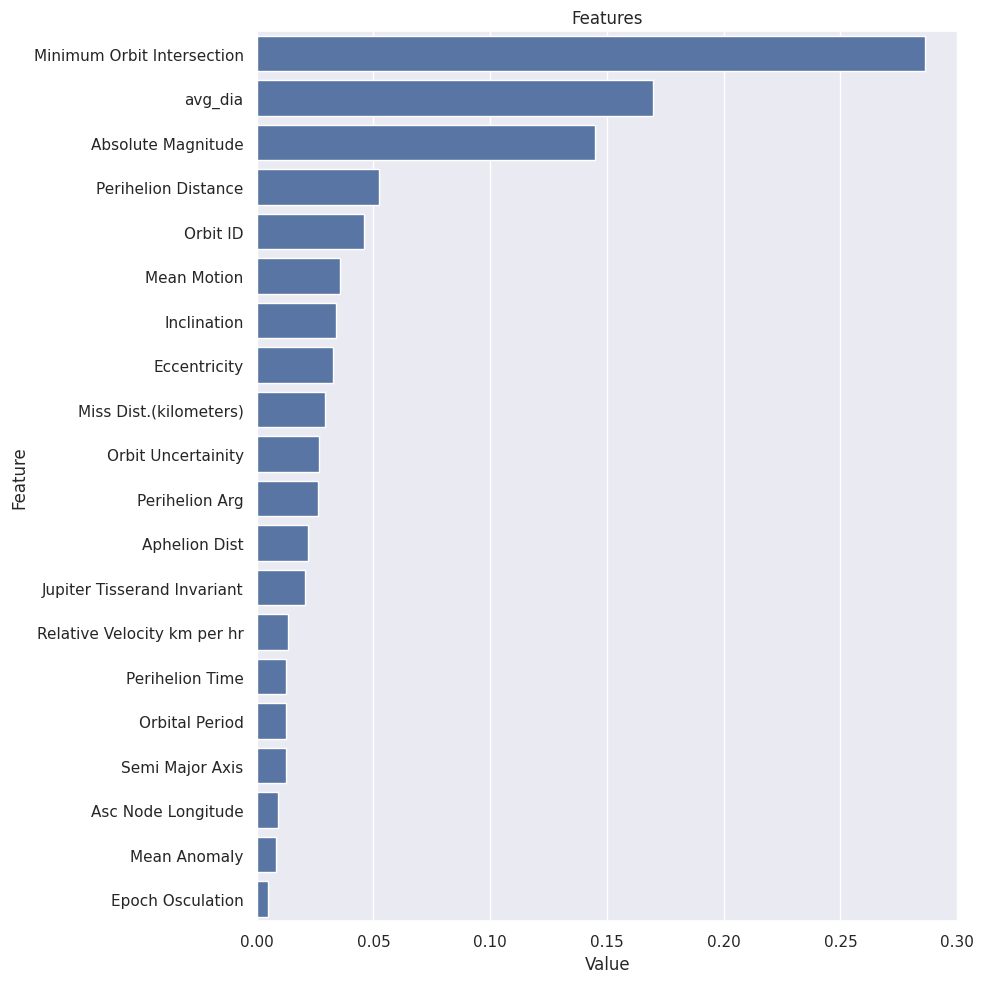

In [ ]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(xgboost_final, X, num=20)